Bacis Ensemble Technique

Dataset : Breast Cancer Dataset

Models :  Classifier Model


        1. Gradient Boosting Machine (GBM) <br>
        2. Extreme Gradient Boosting Machine (XGBM)<br>
        3. LightGBM<br>
        4. CatBoost<br>
        5. Ada Boosting

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [ ]:
print(dataset.DESCR)
print(dataset.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix


In [ ]:
X=np.asarray(dataset.data)
Y=np.asarray(dataset.target)
labels=['malignant' 'benign']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradBoost=GradientBoostingClassifier(n_estimators=200,learning_rate=0.75,min_samples_leaf=5,max_depth=4)
GradBoost.fit(X_train,Y_train)
GradBoost.score(X_test,Y_test)

0.956140350877193

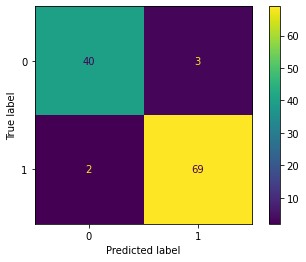

In [ ]:
plot_confusion_matrix(GradBoost, X_test,Y_test)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost=AdaBoostClassifier(n_estimators=200,learning_rate=0.75)
AdaBoost.fit(X_train,Y_train)
AdaBoost.score(X_test,Y_test)

0.9736842105263158

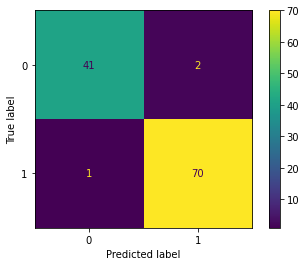

In [ ]:
plot_confusion_matrix(AdaBoost, X_test,Y_test)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
Xgb=XGBClassifier(max_depth=5,learning_rate=0.75,n_estimators=150)
Xgb.fit(X_train,Y_train)
Xgb_prediction=Xgb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,([round(i) for i in Xgb_prediction])))

0.956140350877193


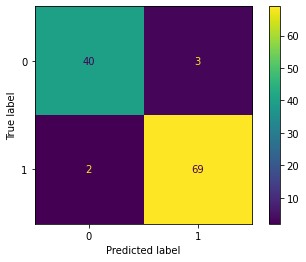

In [ ]:
plot_confusion_matrix(Xgb, X_test,Y_test)

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(max_depth=2,learning_rate=0.55,n_estimators=150)
lgb.fit(X_train,Y_train)
lgb_prediction=lgb.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,([round(i) for i in lgb_prediction])))

0.9736842105263158


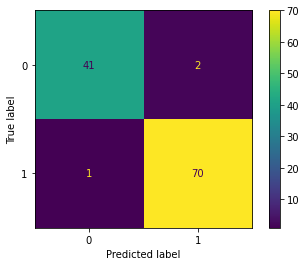

In [ ]:
plot_confusion_matrix(lgb, X_test,Y_test)

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 48kB/s 


In [ ]:
from catboost import CatBoostClassifier,Pool
cb=CatBoostClassifier(max_depth=5,learning_rate=0.75,n_estimators=150)
pool=Pool(X_train,Y_train)
cb.fit(pool)
#cb.fit(X_train,Y_train)
cb_prediction=cb.predict(X_test)

0:	learn: 0.1803090	total: 52.7ms	remaining: 7.85s
1:	learn: 0.1334384	total: 57.2ms	remaining: 4.23s
2:	learn: 0.0934249	total: 61.4ms	remaining: 3.01s
3:	learn: 0.0705553	total: 65.7ms	remaining: 2.4s
4:	learn: 0.0501835	total: 69.7ms	remaining: 2.02s
5:	learn: 0.0408710	total: 73.9ms	remaining: 1.77s
6:	learn: 0.0336938	total: 78.1ms	remaining: 1.59s
7:	learn: 0.0261795	total: 82.3ms	remaining: 1.46s
8:	learn: 0.0211465	total: 86.6ms	remaining: 1.36s
9:	learn: 0.0198918	total: 90.8ms	remaining: 1.27s
10:	learn: 0.0166347	total: 95.8ms	remaining: 1.21s
11:	learn: 0.0154716	total: 104ms	remaining: 1.2s
12:	learn: 0.0119901	total: 109ms	remaining: 1.15s
13:	learn: 0.0103600	total: 113ms	remaining: 1.1s
14:	learn: 0.0085600	total: 118ms	remaining: 1.06s
15:	learn: 0.0070026	total: 122ms	remaining: 1.02s
16:	learn: 0.0062381	total: 127ms	remaining: 990ms
17:	learn: 0.0054347	total: 131ms	remaining: 961ms
18:	learn: 0.0050887	total: 135ms	remaining: 933ms
19:	learn: 0.0047236	total: 140ms

In [ ]:
print(accuracy_score(Y_test,([round(i) for i in cb_prediction])))

0.9736842105263158


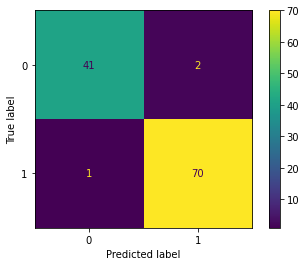

In [ ]:
plot_confusion_matrix(cb, X_test,Y_test)

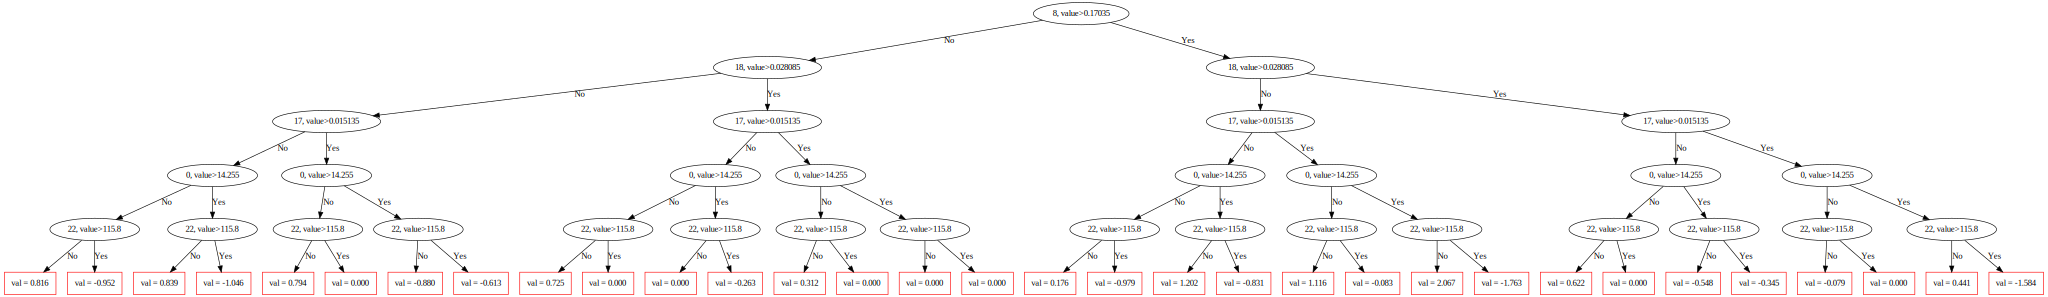

In [ ]:
cb.plot_tree(tree_idx=1,pool=pool)